## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env1 import TicTacToe #- import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    #print(valid_Actions)
    return valid_Actions

In [4]:
# Testing
# env = TicTacToe()
# (valid_actions(env.reset()))

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    #add the current action as a key so that its q-value could be stored
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0.0

In [6]:
def retrieve_from_dict(state, possible_actions): # retrive the best state-action pair from Q_dict
    q_list=[]
    for action in possible_actions:
        q_list.append(Q_dict[state][action])
    if q_list:
        max_next = max(q_list)
    else:
        max_next = 0.0
    return max_next

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [7]:
def epsilon_greedy(state, possible_actions, episode):
    
        max_epsilon = 1.0
        min_epsilon = 0.001
        epsilon = (min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*episode))

        z = np.random.random()
        
        if z < epsilon:                     #exploration
            
            action = random.choice(possible_actions)
            return action
        else:                              #greedy strategy
      
            Q_list=[]
            if Q_dict[state]:
#                 print('State exists in Q_dict')
                for action in possible_actions:
                    Q_list.append(Q_dict[state][action])
                maxQ=max(Q_list)
                if Q_list.count(maxQ) > 1:
                    #print('More than one best option')
                    best_options = [i for i in range(len(possible_actions)) if Q_list[i] == maxQ]
                    i = random.choice(best_options)
                else:
                    i = Q_list.index(maxQ)

                return possible_actions[i]
            else:
#                 print('State does not exist in Q_dict')
                action = random.choice(possible_actions) # choose any possible action randomly
                return action
            
            
            




#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

rewards_tracked = { }
print(len(Q_dict))
print(len(States_track))
print(len(rewards_tracked))
print(rewards_tracked)

0
0
0
{}


In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-x-2-5-x-1-x-4-x',(4,9)),('x-x-2-5-x-1-x-8-x',(4,9)),('x-x-1-x-x-9-8-x-2',(7,5)),('x-2-4-x-x-7-x-x-1',(0,9)),('x-x-7-8-3-x-6-x-x',(0,1)), ('8-x-x-2-x-x-3-x-7',(7, 5)),('5-x-6-x-x-x-8-x-3',(4,1)),('5-x-x-9-6-x-x-x-2',(6,1)),('x-x-x-x-x-x-x-x-x',(3,5)), ('x-x-x-x-x-x-x-x-x',(6,3)),('8-x-4-x-x-x-x-5-9',(6, 1)),('x-x-x-x-x-8-x-5-x',(6, 7)),('x-x-x-x-4-8-7-5-x',(3, 3)),('x-8-x-x-x-x-x-x-3',(7, 7)),('x-x-x-x-9-x-x-6-x',(3, 5)),('x-x-x-x-9-x-x-6-x',(2, 5)),('x-x-x-x-x-x-6-3-x',(1, 7)), ('4-x-x-x-x-1-x-x-x',(7, 7)),('x-x-7-x-x-x-x-2-x',(5, 3)),('x-x-x-x-x-8-3-x-x',(7, 7)),('x-x-x-3-x-x-x-x-4',(0, 7)),('x-x-x-2-x-x-6-9-1',(0, 7)),('x-x-x-x-1-x-4-x-x',(5, 9))]
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         
  

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()
States_track

defaultdict(dict,
            {'x-x-2-5-x-1-x-4-x': {(4, 9): []},
             'x-x-2-5-x-1-x-8-x': {(4, 9): []},
             'x-x-1-x-x-9-8-x-2': {(7, 5): []},
             'x-2-4-x-x-7-x-x-1': {(0, 9): []},
             'x-x-7-8-3-x-6-x-x': {(0, 1): []},
             '8-x-x-2-x-x-3-x-7': {(7, 5): []},
             '5-x-6-x-x-x-8-x-3': {(4, 1): []},
             '5-x-x-9-6-x-x-x-2': {(6, 1): []},
             'x-x-x-x-x-x-x-x-x': {(3, 5): [], (6, 3): []},
             '8-x-4-x-x-x-x-5-9': {(6, 1): []},
             'x-x-x-x-x-8-x-5-x': {(6, 7): []},
             'x-x-x-x-4-8-7-5-x': {(3, 3): []},
             'x-8-x-x-x-x-x-x-3': {(7, 7): []},
             'x-x-x-x-9-x-x-6-x': {(3, 5): [], (2, 5): []},
             'x-x-x-x-x-x-6-3-x': {(1, 7): []},
             '4-x-x-x-x-1-x-x-x': {(7, 7): []},
             'x-x-7-x-x-x-x-2-x': {(5, 3): []},
             'x-x-x-x-x-8-3-x-x': {(7, 7): []},
             'x-x-x-3-x-x-x-x-4': {(0, 7): []},
             'x-x-x-2-x-x-6-9-1': {(0, 7): []}

#### Define hyperparameters  ---write your code here

In [13]:
#Defining parameters for the experiment

EPISODES = 5000
#EPISODES = 5000000
LR = 0.2                        #learning rate
GAMMA = 0.9


threshold = 100                #every these many episodes,the Q-values for the tracked states will be stored/appended (convergence graphs)
     
policy_threshold = 200         #every these many episodes, the Q-dict will be updated

### Q-update loop ---write your code here

In [14]:

start_time = time.time()
total_reward = 0
rewards_all_episodes = []  # for tracking rewards per episode
agent_win_count = 0        # count of total wins by agent across all episodes
env_win_count = 0          # count of total wins by environment across all episodes
tie_count = 0.0            # count of total ties across all episodes


for episode in range(0,EPISODES):
    print('EPISODE: ', episode)
    reward = None
    done = False
    total_reward = 0
    no_of_agent_moves = 0  # Track num of moves made by agent per episode
    no_of_env_moves = 0    # Track num of moves made by env per episode
    game_result = ''       # Track the result per episode

    ##### Start writing your code from the next line
    env = TicTacToe()             # Instantiate the environment    

    initial_state = env.reset()   # Reset the board to start condition
    curr_state = initial_state  
    
    add_to_dict(curr_state)       # Add the initial state to Q_dict
    
    curr_action = random.choice(valid_actions(curr_state))     # Randomly choose the first action by agent
    
    curr_state = env.state_transition(curr_state, curr_action) # Place the agent's move on the board

    add_to_dict(curr_state)         # Add this state to the Q_dict

    no_of_agent_moves += 1          # Increment the num of moves made by agent
 
     
    next_state, reward, done = env.step(curr_state, curr_action)   # The environment takes the next step

    add_to_dict(next_state)         # Add this state to the Q_dict

    no_of_env_moves +=1             # Increment the num of moves made by environment
  
    total_reward += reward          # Increment the total reward won by agent for this episode

    while not done:                 # The episode will run only till one wins the game or there is a tie
   
        agent_initial_state = curr_state.copy()  # Copy the current state into a new variable so that it's not mutated
        
        curr_action = epsilon_greedy(Q_state(agent_initial_state), valid_actions(curr_state), episode) #Agent uses epsilon greedy strategy 

        curr_state = env.state_transition(curr_state, curr_action)

        add_to_dict(curr_state)

        no_of_agent_moves += 1
    
        
        next_state, reward, done = env.step(curr_state, curr_action)
        add_to_dict(next_state)

        total_reward += -1            
       
        if done == True:              # Terminal state
            
            total_reward += reward
         
            Q_dict[Q_state(agent_initial_state)][curr_action] += LR * ((reward + (GAMMA*0.0)) - Q_dict[Q_state(agent_initial_state)][curr_action] ) # No action is possible from the next state as it is terminal
            
            if reward == 10:               # Agent won
                agent_win_count += 1
                game_result = 'Agent Win'
            if reward == 0:                # Tie
                tie_count += 1 
                game_result = 'Tie'
            if reward == -10:              # Env won
                env_win_count += 1
                game_result = 'Env Win'

            break
        else:
        
            no_of_env_moves +=1
            
            # UPDATE RULE      
            max_next = max(Q_dict[Q_state(next_state)],key=Q_dict[Q_state(next_state)].get)   #this gets the action corresponding to max q-value of next state
            
            Q_dict[Q_state(agent_initial_state)][curr_action] += LR * ((reward + (GAMMA*(Q_dict[Q_state(next_state)][max_next]))) - Q_dict[Q_state(agent_initial_state)][curr_action] ) 
            
            agent_initial_state = next_state       
            
    # Add rewards per episode to rewards array        
    rewards_all_episodes.append(total_reward)
    print('***** EPISODE SUMMARY *****')
    print('Total agent moves: ',no_of_agent_moves)
    print('Total env moves: ',no_of_env_moves)
    print('Total reward: ',total_reward)
    print('Game result: ',game_result)

    #TRACKING REWARDS AND STATES

    if Q_state(initial_state) not in rewards_tracked:     #storing rewards
        #print('Adding!')
        rewards_tracked[Q_state(initial_state)] = []
        rewards_tracked[Q_state(initial_state)].append(total_reward)
    else:
        rewards_tracked[Q_state(initial_state)].append(total_reward)
        #save_obj(rewards_tracked,'Rewards')

    if ((episode+1) % threshold) == 0:   
        save_obj(rewards_tracked,'Rewards')   

    #TRACKING Q-VALUES
    if (episode == threshold-1):        
        initialise_tracking_states()

    if ((episode+1) % threshold) == 0:   
        save_tracking_states()
        save_obj(States_track,'States_tracked')   

    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 'threshold' num of episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    


save_obj(rewards_tracked,'Rewards')   
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')      


elapsed_time = time.time() - start_time


EPISODE:  0
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  5
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  6
***** game over, 

Game result:  Tie
EPISODE:  72
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  73
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  74
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  75
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  76
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  77
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  78
Row win!
***** game over, agent won *****
***

Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  152
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  153
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  154
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  155
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  156
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  157
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves

Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  232
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  233
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  234
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  235
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  236
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  237
***** game over, 

EPISODE:  311
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  312
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  313
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  314
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  315
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  316
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  317
Col win!
***** game over, agent won *****
**

Game result:  Tie
EPISODE:  391
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  392
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  393
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  394
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  395
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  396
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win

Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  471
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  472
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  473
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  474
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  475
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISOD

Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  550
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  551
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  552
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  553
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  554
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  555
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4


Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  629
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  630
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  631
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  632
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  633
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  634
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EP

***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  709
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  710
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  711
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  712
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  713
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPIS

Game result:  Tie
EPISODE:  789
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  790
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  791
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  792
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  793
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  794
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  79

EPISODE:  869
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  870
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  871
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  872
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  873
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  874
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  875
***** game over, it is a tie ***

***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  950
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  951
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  952
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  953
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  954
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  955
Row win!
***** game over, envir

***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1030
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1031
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  1032
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1033
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1034
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  1035
Row win!
***** game over, environment won *****

EPISODE:  1109
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  1110
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  1111
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1112
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1113
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1114
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Gam

EPISODE:  1188
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1189
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1190
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1191
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1192
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  1193
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env mov

Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1268
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1269
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1270
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1271
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1272
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1273
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves

Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1348
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1349
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1350
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1351
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1352
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1353
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent mo

Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1409
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1410
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1411
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1412
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1413
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env W

Game result:  Env Win
EPISODE:  1497
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1498
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1499
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  1500
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1501
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1502
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISOD

***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1588
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  1589
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1590
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  1591
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1592
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1593
Col win!
***** game over, agent won *****
***** EPIS

***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  1668
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1669
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1670
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1671
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1672
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1673
Row win

Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1747
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1748
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  1749
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1750
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1751
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  1752
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Tot

Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1827
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1828
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1829
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1830
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1831
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1832
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  A

EPISODE:  1906
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1907
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1908
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  1909
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1910
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1911
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1912
Diagonal win!
***** game over, e

Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  1988
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1989
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  1990
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1991
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  1992
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  1993

Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2066
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2067
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2068
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  2069
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2070
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2071
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY

Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  2146
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2147
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  2148
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2149
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2150
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2151
***** game

Total reward:  5
Game result:  Agent Win
EPISODE:  2225
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2226
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2227
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2228
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2229
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  2230
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  

***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2305
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  2306
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2307
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2308
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2309
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2310
Row win!
***** game over, environment won *****
***** EPI

Total reward:  -5
Game result:  Tie
EPISODE:  2384
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2385
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  2386
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2387
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2388
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2389
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result

Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2464
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  2465
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2466
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2467
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  2468
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2469
Diagonal win!
***** game over, agent won *****
***** EPISODE SUM

Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2543
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2544
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2545
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2546
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2547
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  2548
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env 

***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2623
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  2624
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2625
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2626
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2627
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2628
Col win!
***** game over, environment won *****
****

Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2702
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2703
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  2704
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  2705
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2706
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  2707
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env

Game result:  Tie
EPISODE:  2781
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2782
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2783
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2784
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  2785
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2786
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Gam

Total reward:  -5
Game result:  Tie
EPISODE:  2861
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2862
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2863
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  2864
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2865
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2866
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Tota

EPISODE:  2940
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  2941
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  2942
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  2943
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2944
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  2945
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game res

***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3020
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3021
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  3022
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3023
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3024
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  3025
Diagonal win!
***** game over, agent won *****

EPISODE:  3099
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  3100
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3101
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3102
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3103
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3104
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3

EPISODE:  3179
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3180
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3181
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3182
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3183
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3184
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3185
Diagonal win!
***** game over, agent won *****
**

Total reward:  -5
Game result:  Tie
EPISODE:  3259
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3260
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3261
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3262
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3263
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  3264
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPIS

Game result:  Tie
EPISODE:  3339
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3340
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3341
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3342
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3343
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3344
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  3345
R

Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3419
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3420
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3421
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3422
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3423
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3424
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
To

Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  3499
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3500
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3501
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3502
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3503
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3504
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4


Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3579
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  3580
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  3581
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3582
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  3583
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  

***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3659
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3660
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3661
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3662
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3663
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3664
Col win!
***** game over, agent won *****
***** EPISODE SU

EPISODE:  3738
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3739
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3740
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3741
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3742
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3743
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  3744
***** g

Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3808
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3809
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3810
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  3811
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3812
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPI

Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3898
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3899
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3900
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3901
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3902
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  3903
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total e

Total reward:  -14
Game result:  Env Win
EPISODE:  3978
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  3979
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  3980
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  3981
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3982
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  3983
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total rewa

Game result:  Tie
EPISODE:  4057
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4058
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4059
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4060
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4061
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  4062
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4

Game result:  Tie
EPISODE:  4137
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4138
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4139
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4140
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4141
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4142
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  7
Game result:  Agent Win
EPISODE:  4143
Diagonal win!
*****

Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4204
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4205
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4206
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  4207
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4208
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4209
Diagonal win!
***** game over

Total reward:  6
Game result:  Agent Win
EPISODE:  4297
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  4298
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4299
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4300
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4301
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4302
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total rewar

Total reward:  -5
Game result:  Tie
EPISODE:  4377
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4378
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  4379
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4380
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4381
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4382
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total rewar

Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4497
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4498
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4499
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4500
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4501
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  4502
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves

Game result:  Env Win
EPISODE:  4576
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4577
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  4578
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4579
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4580
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4581
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  2
Total en

***** EPISODE SUMMARY *****
Total agent moves:  2
Total env moves:  1
Total reward:  -12
Game result:  Env Win
EPISODE:  4634
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4635
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4636
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4637
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4638
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4639
***** game over, it is a tie *****

Total reward:  -5
Game result:  Tie
EPISODE:  4695
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4696
Diagonal win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4697
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4698
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4699
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4700
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3

Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4775
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4776
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4777
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4778
Row win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4779
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4780
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Tota

***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4895
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4896
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4897
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4898
Col win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4899
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4900
***** game over, it is a tie *****
***** EPISODE SUMMARY **

***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4975
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  5
Game result:  Agent Win
EPISODE:  4976
***** game over, it is a tie *****
***** EPISODE SUMMARY *****
Total agent moves:  5
Total env moves:  4
Total reward:  -5
Game result:  Tie
EPISODE:  4977
Col win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  -14
Game result:  Env Win
EPISODE:  4978
Diagonal win!
***** game over, environment won *****
***** EPISODE SUMMARY *****
Total agent moves:  3
Total env moves:  2
Total reward:  -13
Game result:  Env Win
EPISODE:  4979
Row win!
***** game over, agent won *****
***** EPISODE SUMMARY *****
Total agent moves:  4
Total env moves:  3
Total reward:  6
Game result:  Agent Win
EPISODE:  4

In [15]:
agent_win_count


1224

In [16]:
tie_count

2313.0

In [17]:
env_win_count

1463

In [18]:
max(rewards_all_episodes)

7

In [19]:
# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),EPISODES/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000


********Average reward per thousand episodes********

1000 :  -4.873999999999959
2000 :  -5.043999999999962
3000 :  -4.6049999999999685
4000 :  -5.023999999999952
5000 :  -4.614999999999961


As we can see that the rewards won by the agent per 1000 games is very random which means we need to train it more. In the later section of the notebook, I have provided game stats for 5 million runs of the game which clearly shows that as the agent plays more games, it gets better at getting postitive rewards.

#### Check the Q-dictionary

In [20]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): 0.0,
              (0, 3): 0.0,
              (0, 5): 0.0,
              (0, 7): 0.0,
              (0, 9): 0.0,
              (1, 1): 0.0,
              (1, 3): 0.0,
              (1, 5): 0.0,
              (1, 7): 0.0,
              (1, 9): 0.0,
              (2, 1): 0.0,
              (2, 3): 0.0,
              (2, 5): 0.0,
              (2, 7): 0.0,
              (2, 9): 0.0,
              (3, 1): 0.0,
              (3, 3): 0.0,
              (3, 5): 0.0,
              (3, 7): 0.0,
              (3, 9): 0.0,
              (4, 1): 0.0,
              (4, 3): 0.0,
              (4, 5): 0.0,
              (4, 7): 0.0,
              (4, 9): 0.0,
              (5, 1): 0.0,
              (5, 3): 0.0,
              (5, 5): 0.0,
              (5, 7): 0.0,
              (5, 9): 0.0,
              (6, 1): 0.0,
              (6, 3): 0.0,
              (6, 5): 0.0,
              (6, 7): 0.0,
              (6, 9): 0.0,
              (7

In [21]:
len(Q_dict)

27868

In [22]:
States_track

defaultdict(dict,
            {'x-x-2-5-x-1-x-4-x': {(4, 9): []},
             'x-x-2-5-x-1-x-8-x': {(4, 9): []},
             'x-x-1-x-x-9-8-x-2': {(7, 5): []},
             'x-2-4-x-x-7-x-x-1': {(0, 9): []},
             'x-x-7-8-3-x-6-x-x': {(0, 1): []},
             '8-x-x-2-x-x-3-x-7': {(7, 5): []},
             '5-x-6-x-x-x-8-x-3': {(4, 1): []},
             '5-x-x-9-6-x-x-x-2': {(6, 1): []},
             'x-x-x-x-x-x-x-x-x': {(3, 5): [0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
         

In [23]:
with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle) 

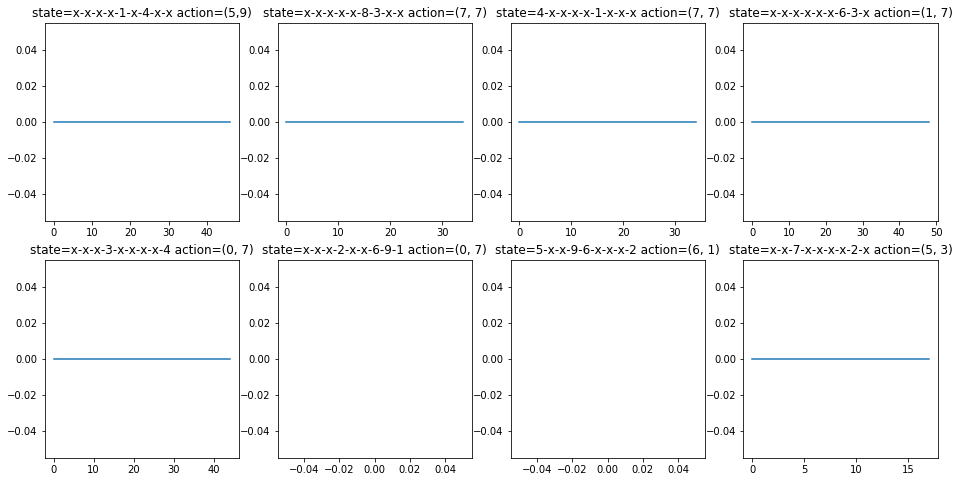

In [24]:
plt.figure(0, figsize=(16,8))
plt.subplot(241)
plt.title('state=x-x-x-x-1-x-4-x-x action=(5,9)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-1-x-4-x-x'][(5, 9)]))),np.asarray(States_track['x-x-x-x-1-x-4-x-x'][(5, 9)]))
plt.subplot(242)
plt.title('state=x-x-x-x-x-8-3-x-x action=(7, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-8-3-x-x'][(7, 7)]))),np.asarray(States_track['x-x-x-x-x-8-3-x-x'][(7, 7)]))
plt.subplot(243)
plt.title('state=4-x-x-x-x-1-x-x-x action=(7, 7)')
plt.plot(np.asarray(range(0, len(States_track['4-x-x-x-x-1-x-x-x'][(7, 7)]))),np.asarray(States_track['4-x-x-x-x-1-x-x-x'][(7, 7)]))
plt.subplot(244)
plt.title('state=x-x-x-x-x-x-6-3-x action=(1, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-6-3-x'][(1, 7)]))),np.asarray(States_track['x-x-x-x-x-x-6-3-x'][(1, 7)]))
plt.subplot(245)
plt.title('state=x-x-x-3-x-x-x-x-4 action=(0, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-3-x-x-x-x-4'][(0, 7)]))),np.asarray(States_track['x-x-x-3-x-x-x-x-4'][(0, 7)]))
plt.subplot(246)
plt.title('state=x-x-x-2-x-x-6-9-1 action=(0, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-2-x-x-6-9-1'][(0, 7)]))),np.asarray(States_track['x-x-x-2-x-x-6-9-1'][(0, 7)]))
plt.subplot(247)
plt.title('state=5-x-x-9-6-x-x-x-2 action=(6, 1)')
plt.plot(np.asarray(range(0, len(States_track['5-x-x-9-6-x-x-x-2'][(6, 1)]))),np.asarray(States_track['5-x-x-9-6-x-x-x-2'][(6, 1)]))
plt.subplot(248)
plt.title('state=x-x-7-x-x-x-x-2-x action=(5, 3)')
plt.plot(np.asarray(range(0, len(States_track['x-x-7-x-x-x-x-2-x'][(5, 3)]))),np.asarray(States_track['x-x-7-x-x-x-x-2-x'][(5, 3)]))
plt.show()

As the agent has played only 5000 games, none of the states that we are interested in tracking have occurred enough times to draw insights.

#### Check the states tracked for Q-values convergence
(non-evaluative)

I ran the code for 5 million episodes in the terminal (as a .py file) as it's much faster and doesn't hang as the Jupyter notebook does. The results after running so many iterations are very impressive. I have taken a screenshot of the game results and pasted it in the cells below. Also, the .pkl file that I have provided with the zip file for this assignment(States_tracked_5M.pkl) contains the states tracked for all the 5 million episodes.

#### Game Stats and Rewards for 50,00,000 episodes (when run as a python file on the terminal)

- LR : 0.2
- GAMMA = 0.9
- threshold : 20000      
- policy_threshold : 20000 

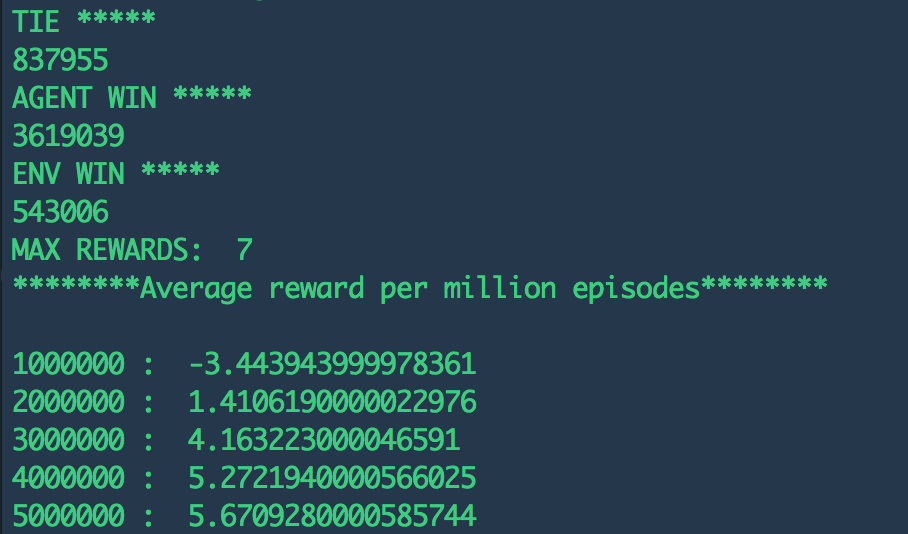

Game stats:
- The agent wins 72% of the total games
- 17% of the games are tied
- The environment is able to win only 11% of the total games

We can also clearly see how the rewards gained by the agent progressively increase per million episodes, from losing most of the games with a -3.4 average reward to winning all the games in the last couple of million games with a average reward of +5.67



In [25]:
# Write the code for plotting the graphs for state-action pairs tracked
with open('States_tracked_5M.pkl', 'rb') as handle:
    States_track = pickle.load(handle) 

In [ ]:
plt.figure(0, figsize=(16,8))
plt.subplot(241)
plt.title('state=x-x-x-x-1-x-4-x-x action=(5,9)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-1-x-4-x-x'][(5, 9)]))),np.asarray(States_track['x-x-x-x-1-x-4-x-x'][(5, 9)]))
plt.subplot(242)
plt.title('state=x-x-x-x-x-8-3-x-x action=(7, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-8-3-x-x'][(7, 7)]))),np.asarray(States_track['x-x-x-x-x-8-3-x-x'][(7, 7)]))
plt.subplot(243)
plt.title('state=4-x-x-x-x-1-x-x-x action=(7, 7)')
plt.plot(np.asarray(range(0, len(States_track['4-x-x-x-x-1-x-x-x'][(7, 7)]))),np.asarray(States_track['4-x-x-x-x-1-x-x-x'][(7, 7)]))
plt.subplot(244)
plt.title('state=x-x-x-x-x-x-6-3-x action=(1, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-6-3-x'][(1, 7)]))),np.asarray(States_track['x-x-x-x-x-x-6-3-x'][(1, 7)]))
plt.subplot(245)
plt.title('state=x-x-x-3-x-x-x-x-4 action=(0, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-3-x-x-x-x-4'][(0, 7)]))),np.asarray(States_track['x-x-x-3-x-x-x-x-4'][(0, 7)]))
plt.subplot(246)
plt.title('state=x-x-x-2-x-x-6-9-1 action=(0, 7)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-2-x-x-6-9-1'][(0, 7)]))),np.asarray(States_track['x-x-x-2-x-x-6-9-1'][(0, 7)]))
plt.subplot(247)
plt.title('state=5-x-x-9-6-x-x-x-2 action=(6, 1)')
plt.plot(np.asarray(range(0, len(States_track['5-x-x-9-6-x-x-x-2'][(6, 1)]))),np.asarray(States_track['5-x-x-9-6-x-x-x-2'][(6, 1)]))
plt.subplot(248)
plt.title('state=x-x-7-x-x-x-x-2-x action=(5, 3)')
plt.plot(np.asarray(range(0, len(States_track['x-x-7-x-x-x-x-2-x'][(5, 3)]))),np.asarray(States_track['x-x-7-x-x-x-x-2-x'][(5, 3)]))
plt.show()

In [ ]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

Let's take the state '5-x-x-9-6-x-x-x-2' and action (6,1) as it's Q-value is highest and have converged to 10. Let's see if this action when taken on this state leads to a win for the agent.

In [ ]:
# State: 5-x-x-9-6-x-x-x-2 action: (6, 1)
#   5 | x | x
#   ----------
#   9 | 6| x       
#   ----------
#   1 | x | 2

As we can see this action, leads to a column win for the agent (5-9-1) so whenever the agent encounters this state, it will try to add 1 to the 6th board position to maximise its rewards by a win.

### Epsilon - decay check

In [ ]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

In [ ]:
plt.plot(time, epsilon)
plt.show()